In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

### Business Understanding

The Dataset contains survey data from stack overflow. The survey was done in 2017, containing various information such as salary, job satisfaction, hiring aspects, programming languages etc. 
The Dataset can be used to answer developer related questions. The questions I want to answer are all related to hiring aspects when trying to get a job as developer.

### Data Understanding

In [59]:
# read in dataset
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#checking shape of dataset
df.shape

(19102, 154)

In [132]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,10369.000000,9150.000000,8737.000000,4669.000000,9460.000000,3418.000000,511.000000
mean,9667.047449,7.403279,7.037656,3.287856,8.364376,58801.541198,32433.238959
std,5377.382344,1.845666,2.086461,6.687881,1.387841,40726.188962,28897.073754
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.117457,0.000000
25%,5027.000000,7.000000,6.000000,0.000000,8.000000,27956.989247,5376.344086
50%,10046.000000,8.000000,7.000000,1.000000,8.000000,51720.268943,30000.000000
75%,14248.000000,9.000000,8.000000,3.000000,9.000000,85000.000000,50000.000000
max,19100.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


Career and Job Satisfaction go up to 10. Mean lies around 7. Stack Overflow Satisfaction mean lies at 8.4.
Salary mean lies at 59000 but goes up to 195000. Expected Salary varies between 0 and 120000.
A lot of variables are categorical variables and have to be handled for the analysis. I decided to do this for each question separately to keep as much data as possible.

In [133]:
#percentage of missing values
df.isnull().mean()

Respondent                     0.000000
Professional                   0.000000
ProgramHobby                   0.000000
Country                        0.000000
University                     0.000000
EmploymentStatus               0.000000
FormalEducation                0.000000
MajorUndergrad                 0.141962
HomeRemote                     0.108014
CompanySize                    0.209278
CompanyType                    0.210628
YearsProgram                   0.001254
YearsCodedJob                  0.155753
YearsCodedJobPast              0.980615
DeveloperType                  0.240814
WebDeveloperType               0.772591
MobileDeveloperType            0.971068
NonDeveloperType               0.912913
CareerSatisfaction             0.117562
JobSatisfaction                0.157392
ExCoderReturn                  0.980808
ExCoderNotForMe                0.981098
ExCoderBalance                 0.981001
ExCoder10Years                 0.980808
ExCoderBelonged                0.980808


A lot of column contain a high percentage of missing values. As I won't use machine learning techniques for my analysis, I decided to handle missing data individually for every question, to keep as much data as possible.

### Question 1: What are the most important aspects when hiring a software developer?

### Data preparation & data modeling

In [61]:
#questions regarding importance of different aspects during hiring process
df_schema = pd.read_csv('./survey_results_schema.csv')
list(df_schema[df_schema.Column == 'ImportantHiringAlgorithms']['Question'])

["Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Knowledge of algorithms and data structures"]

In [62]:
#checking number of NAs for some hiring importance questions
np.sum(df['ImportantHiringRep'].isnull())

8224

In [63]:
np.sum(df['ImportantHiringAlgorithms'].isnull())

8212

In [64]:
np.sum(df['ImportantHiringGettingThingsDone'].isnull())

8253

In [65]:
#look at NA'S
df_noanswer = df[df['ImportantHiringGettingThingsDone'].isnull()==True]

In [66]:
#checking if other hiring importance question are also not answered
df_noanswer['ImportantHiringRep'].value_counts()

Not very important      37
Somewhat important      21
Important               17
Not at all important    15
Very important           8
Name: ImportantHiringRep, dtype: int64

In [67]:
#checking if other hiring importance question are also not answered
df_noanswer['ImportantHiringEducation'].value_counts()

Somewhat important      40
Important               22
Not very important      21
Very important           6
Not at all important     2
Name: ImportantHiringEducation, dtype: int64

Looks like some people answered only certain questions of the hiring importance questions. Nevertheless I want to use only respondents that rated all importance aspects.

In [68]:
# to check if there is a big change in the data porportions if I remove all NAs, I set up a test dataframe
df_test = df.dropna(subset=['ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource','ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone'],axis=0)

In [69]:
#checking proportions in gender
df_test['Gender'].value_counts()/(df_test.shape[0] - sum(df_test['Gender'].isnull()))

Male                                                       0.904438
Female                                                     0.074959
Other                                                      0.005041
Gender non-conforming                                      0.003945
Male; Other                                                0.003068
Female; Transgender                                        0.002411
Male; Gender non-conforming                                0.001425
Transgender                                                0.001425
Female; Gender non-conforming                              0.000986
Male; Female; Transgender; Gender non-conforming; Other    0.000438
Transgender; Gender non-conforming                         0.000438
Male; Female                                               0.000329
Male; Female; Transgender; Gender non-conforming           0.000219
Female; Transgender; Gender non-conforming                 0.000219
Male; Transgender                               

In [70]:
df['Gender'].value_counts()/(df.shape[0] - sum(df['Gender'].isnull()))

Male                                                       0.903486
Female                                                     0.075136
Other                                                      0.005655
Gender non-conforming                                      0.004183
Male; Other                                                0.003253
Female; Transgender                                        0.002169
Transgender                                                0.001549
Male; Gender non-conforming                                0.001472
Female; Gender non-conforming                              0.000852
Transgender; Gender non-conforming                         0.000387
Male; Female                                               0.000387
Male; Female; Transgender; Gender non-conforming; Other    0.000310
Male; Transgender                                          0.000310
Female; Transgender; Gender non-conforming                 0.000232
Male; Female; Transgender; Gender non-conforming

Looks like gender proportions roughly stay the same.

In [71]:
#checking proportions in profession
df_test['Professional'].value_counts()/(df_test.shape[0] - sum(df_test['Professional'].isnull()))

Professional developer                                  0.759379
Student                                                 0.113704
Professional non-developer who sometimes writes code    0.091137
Used to be a professional developer                     0.019481
None of these                                           0.016299
Name: Professional, dtype: float64

In [72]:
df['Professional'].value_counts()/(df.shape[0] - sum(df['Professional'].isnull()))

Professional developer                                  0.721076
Student                                                 0.147681
Professional non-developer who sometimes writes code    0.093289
None of these                                           0.019265
Used to be a professional developer                     0.018689
Name: Professional, dtype: float64

Within the test dataset the proportion of students is lower compared to the total dataset. That makes sense, as maybe not all students want to answer the hiring question, maybe because of a lack of working experience. 

In [73]:
#drop missing values and only keep respondents who answered all questions regarding importance when hiring
df = df.dropna(subset=['ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource','ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone'],axis=0)

In [74]:
#creating new dataframe with only importance hiring columns
df_new = df[['ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource','ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone']].copy()

In [75]:
#check new dataframe
df_new.head()

,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone
0,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important
1,Important,Important,Important,Important,Somewhat important,Somewhat important,Not very important,Somewhat important,Not very important,Very important
3,Somewhat important,Somewhat important,Very important,Very important,Somewhat important,Somewhat important,Not very important,Not very important,Important,Very important
5,Not very important,Not very important,Not very important,Important,Not very important,Not very important,Not very important,Not very important,Not at all important,Not very important
6,Very important,Important,Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not very important,Very important


In [76]:
#creating dummy variables for categorical variables
df_new = pd.get_dummies(df_new)

In [77]:
df_new.head()

,ImportantHiringAlgorithms_Important,ImportantHiringAlgorithms_Not at all important,ImportantHiringAlgorithms_Not very important,ImportantHiringAlgorithms_Somewhat important,ImportantHiringAlgorithms_Very important,ImportantHiringTechExp_Important,ImportantHiringTechExp_Not at all important,ImportantHiringTechExp_Not very important,ImportantHiringTechExp_Somewhat important,ImportantHiringTechExp_Very important,...,ImportantHiringRep_Important,ImportantHiringRep_Not at all important,ImportantHiringRep_Not very important,ImportantHiringRep_Somewhat important,ImportantHiringRep_Very important,ImportantHiringGettingThingsDone_Important,ImportantHiringGettingThingsDone_Not at all important,ImportantHiringGettingThingsDone_Not very important,ImportantHiringGettingThingsDone_Somewhat important,ImportantHiringGettingThingsDone_Very important
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [78]:
# I only want to have a look at the aspects that are stated as "very important", therefore creating new dataframe
df_veryimp = df_new[['ImportantHiringAlgorithms_Very important','ImportantHiringOpenSource_Very important','ImportantHiringPMExp_Very important','ImportantHiringCompanies_Very important','ImportantHiringTitles_Very important','ImportantHiringEducation_Very important','ImportantHiringRep_Very important','ImportantHiringGettingThingsDone_Very important']].copy()

In [79]:
#checking database
df_veryimp.head()

,ImportantHiringAlgorithms_Very important,ImportantHiringOpenSource_Very important,ImportantHiringPMExp_Very important,ImportantHiringCompanies_Very important,ImportantHiringTitles_Very important,ImportantHiringEducation_Very important,ImportantHiringRep_Very important,ImportantHiringGettingThingsDone_Very important
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,1


In [80]:
# checking column names
df_veryimp.columns

Index(['ImportantHiringAlgorithms_Very important',
       'ImportantHiringOpenSource_Very important',
       'ImportantHiringPMExp_Very important',
       'ImportantHiringCompanies_Very important',
       'ImportantHiringTitles_Very important',
       'ImportantHiringEducation_Very important',
       'ImportantHiringRep_Very important',
       'ImportantHiringGettingThingsDone_Very important'],
      dtype='object')

In [81]:
#renaming columns for bar chart later
df_veryimp.columns = ['Knowledge Algorithms','Contribution Open Source','Project Management','Previous Companies','Previous Titles','Education','Stack Overflow Reputation','Getting Things Done']

In [82]:
df_veryimp.head()

,Knowledge Algorithms,Contribution Open Source,Project Management,Previous Companies,Previous Titles,Education,Stack Overflow Reputation,Getting Things Done
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,1


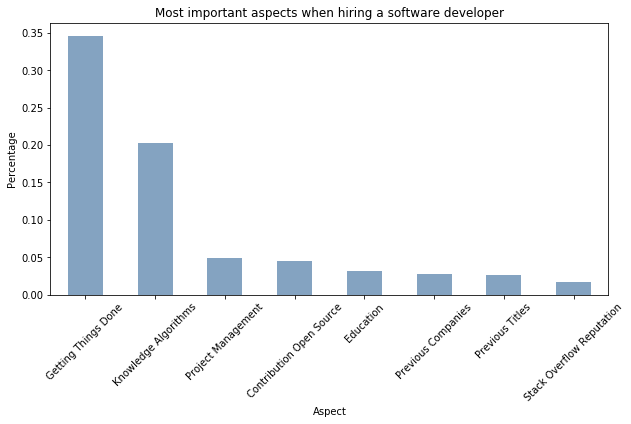

In [83]:
# bar chart with most important aspects, ordered by importance
plt.figure(figsize=(10,5))
df_veryimp.mean().sort_values(ascending=False).plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6))
plt.title("Most important aspects when hiring a software developer")
plt.xlabel('Aspect')
plt.xticks(rotation=45)
plt.ylabel('Percentage');

### Data evaluation

In [84]:
df_veryimp.mean().sort_values(ascending=False)

Getting Things Done          0.345935
Knowledge Algorithms         0.202913
Project Management           0.048992
Contribution Open Source     0.045327
Education                    0.031054
Previous Companies           0.027486
Previous Titles              0.026136
Stack Overflow Reputation    0.017552
dtype: float64

Getting things done and knowledge of algorithms are the two most important aspects when hiring a software developer. It would be also interesting to have a look at hiring aspects only for certain professional types.

### Question 2: At which platform should I maintain a job profile?

### Data preparation & data modeling

In [85]:
#checking survey question
list(df_schema[df_schema.Column == 'JobProfile']['Question'])

['On which of the following sites do you maintain a profile, CV, or resumé?']

In [86]:
#checking for missing values
np.sum(df.JobProfile.isnull())

2401

I decided to keep the missing values as they don't change my analysis.

In [87]:
# looking at most important platforms
df.JobProfile.value_counts()

LinkedIn                                                                       4904
LinkedIn; Other                                                                 523
Other                                                                           362
LinkedIn; Xing                                                                  195
Indeed; LinkedIn                                                                179
Xing                                                                            154
LinkedIn; Monster                                                               144
Glassdoor; LinkedIn                                                             123
LinkedIn; Naukri                                                                122
LinkedIn; Monster; Naukri                                                        73
Hired.com; LinkedIn                                                              64
Glassdoor; Indeed; LinkedIn                                                 

As job platform is categorical data, I need to clean and transform the column:

In [88]:
#column jobprofile needs to be cleaned, to have each platform separated
#leaving out "Others" as possible value, as we can't get any information from "Other"
possible_vals = ['CW_Jobs', 'Glassdoor', 'Indeed', 'JobSite.co.uk', 'LinkedIn', 'Monster', 'Reed.co.uk',
                 'Total_Jobs','Pracuj,Dice','Xing','Naukri','Hired.com','Stepstone','TripleByte','Workopolis']

In [89]:
platform = df['JobProfile'].value_counts().reset_index()
platform.head()

,index,JobProfile
0,LinkedIn,4904
1,LinkedIn; Other,523
2,Other,362
3,LinkedIn; Xing,195
4,Indeed; LinkedIn,179


In [90]:
#change name of index column
platform.rename(columns={'index': 'platform', 'JobProfile': 'count'}, inplace=True)
platform.head()

,platform,count
0,LinkedIn,4904
1,LinkedIn; Other,523
2,Other,362
3,LinkedIn; Xing,195
4,Indeed; LinkedIn,179


In [91]:
#function to calculate total count
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [92]:
#having a look at new dataframe
platform_df = total_count(platform, 'platform', 'count', possible_vals)
platform_df

,platform,count
4,LinkedIn,7124
2,Indeed,659
5,Monster,650
8,Xing,425
1,Glassdoor,348
9,Naukri,341
10,Hired.com,198
3,JobSite.co.uk,79
0,CW_Jobs,76
6,Reed.co.uk,72


In [125]:
platform_df['percentage'] = platform_df['count']/platform_df.sum()[1]

In [126]:
platform_df

,platform,count,percentage
4,LinkedIn,7124,0.708433
2,Indeed,659,0.065533
5,Monster,650,0.064638
8,Xing,425,0.042263
1,Glassdoor,348,0.034606
9,Naukri,341,0.033910
10,Hired.com,198,0.019690
3,JobSite.co.uk,79,0.007856
0,CW_Jobs,76,0.007558
6,Reed.co.uk,72,0.007160


In [127]:
#using only top 5
top_5 = platform_df.head(5)
top_5

,platform,count,percentage
4,LinkedIn,7124,0.708433
2,Indeed,659,0.065533
5,Monster,650,0.064638
8,Xing,425,0.042263
1,Glassdoor,348,0.034606


### Data evaluation

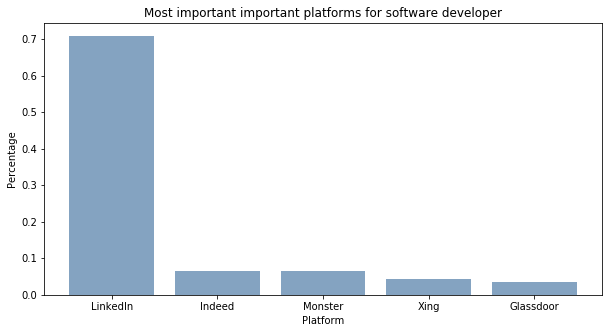

In [129]:
#bar chart with top 5 job platforms
plt.figure(figsize=(10,5))
plt.bar(top_5['platform'], top_5['percentage'],color=(0.2, 0.4, 0.6, 0.6))
plt.title("Most important important platforms for software developer")
plt.xlabel('Platform');
plt.ylabel('Percentage');

To get a job as a developer, it is best to maintain a profile at LinkedIn. Over 70% stated that LinkedIn is most important.

### Question 3: How do you even know that a company is hiring?

### Data preparation & data modeling

In [95]:
#checking number of NAs
np.sum(df.LearnedHiring.isnull())

2247

In [134]:
#Creating two dataframes to inspect missing values more closely
df_nolearned = df[df['LearnedHiring'].isnull()==True]
df_learned = df[df['LearnedHiring'].isnull()==False]

In [97]:
#checking differences in gender
df_nolearned['Gender'].value_counts()/(df_nolearned.shape[0] - sum(df_nolearned['Gender'].isnull()))

Male                                                       0.916189
Female                                                     0.057262
Other                                                      0.006247
Male; Other                                                0.005726
Female; Transgender                                        0.005206
Gender non-conforming                                      0.004164
Male; Gender non-conforming                                0.001562
Female; Gender non-conforming                              0.001041
Male; Female; Transgender                                  0.000521
Transgender; Gender non-conforming                         0.000521
Male; Female; Transgender; Gender non-conforming; Other    0.000521
Transgender                                                0.000521
Male; Female; Gender non-conforming                        0.000521
Name: Gender, dtype: float64

In [98]:
df_learned['Gender'].value_counts()/(df_learned.shape[0] - sum(df_learned['Gender'].isnull()))

Male                                                       0.901305
Female                                                     0.079678
Other                                                      0.004720
Gender non-conforming                                      0.003887
Male; Other                                                0.002360
Female; Transgender                                        0.001666
Transgender                                                0.001666
Male; Gender non-conforming                                0.001388
Female; Gender non-conforming                              0.000972
Male; Female; Transgender; Gender non-conforming; Other    0.000416
Transgender; Gender non-conforming                         0.000416
Male; Female                                               0.000416
Male; Transgender                                          0.000278
Male; Female; Transgender; Gender non-conforming           0.000278
Female; Transgender; Gender non-conforming      

Looks like the percentage of male respondents that didn't answer the hiring question is a little bit higher, than the ones that answered the question. But for me it would be still ok to drop it.

In [99]:
#checking differences in profession
df_nolearned['Professional'].value_counts()/(df_nolearned.shape[0] - sum(df_nolearned['Professional'].isnull()))

Professional developer                                  0.446373
Student                                                 0.372052
None of these                                           0.075211
Professional non-developer who sometimes writes code    0.072096
Used to be a professional developer                     0.034268
Name: Professional, dtype: float64

In [100]:
df_learned['Professional'].value_counts()/(df_learned.shape[0] - sum(df_learned['Professional'].isnull()))

Professional developer                                  0.845974
Professional non-developer who sometimes writes code    0.096405
Student                                                 0.042231
Used to be a professional developer                     0.015390
Name: Professional, dtype: float64

Among the respondents that didn't answer the hiring question, the percentage of students is a lot higher, than the group that answered the question. That makes also sense, as student might choose to not answer the question, due to a lack of working experience. Therefore I choose to drop the NAs.

In [101]:
#droping missing values
df2 = df.dropna(subset=['LearnedHiring'],axis=0)

In [102]:
#checking value counts of possible answers 
df2.LearnedHiring.value_counts()

A friend, family member, or former colleague told me                            2240
I was contacted directly by someone at the company (e.g. internal recruiter)    1481
A general-purpose job board                                                     1096
An external recruiter or headhunter                                             1032
Some other way                                                                   651
I visited the company's Web site and found a job listing there                   649
A career fair or on-campus recruiting event                                      616
A tech-specific job board                                                        357
Name: LearnedHiring, dtype: int64

In [103]:
#replacing categorical data with shorter statements
df2.replace({'LearnedHiring': {'A friend, family member, or former colleague told me': 'Friend/Family/Colleague', 'I was contacted directly by someone at the company (e.g. internal recruiter)': 'Internal recruiter',
                              'A general-purpose job board':'Genereal-purpose job board','An external recruiter or headhunter':'External recruiter',
                              'Some other way':'Other',"I visited the company's Web site and found a job listing there":"Company's website",'A career fair or on-campus recruiting event':'Career fair','A tech-specific job board':'Tech-specific job board'}},inplace=True)

In [110]:
#checking value counts again
df2.LearnedHiring.value_counts()/df2.shape[0]

Friend/Family/Colleague       0.275794
Internal recruiter            0.182344
Genereal-purpose job board    0.134942
External recruiter            0.127062
Other                         0.080153
Company's website             0.079906
Career fair                   0.075843
Tech-specific job board       0.043955
Name: LearnedHiring, dtype: float64

### Data evaluation

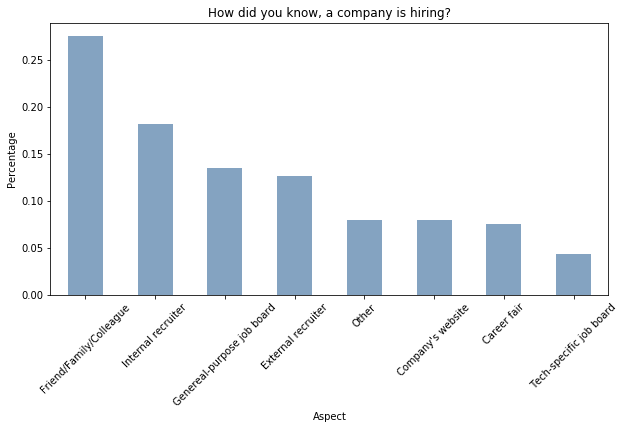

In [113]:
#plotting most important aspects
plt.figure(figsize=(10,5))
(df2.LearnedHiring.value_counts()/df2.shape[0]).plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6))
plt.title("How did you know, a company is hiring?")
plt.xlabel('Aspect')
plt.xticks(rotation=45)
plt.ylabel('Percentage');

Most people get the information if a company is hiring from friends & colleagues or an internal recruiter. 28% get the information from friens, family, colleagues and 18% from internal recruiters. Tech-specific job boards are not the best source of information.